# Goal

Establish a coorelation and prediction regarding changes in home prices coorelated against the impact of international conflict, both war and economic downturn for Fayetteville, NC to establihsh a larger goal of United State Military towns

# Imports


In [1]:
from collections import Counter
import scipy.stats as stats
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, root_mean_squared_error
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA

# Step One
Establish average home price changes overtime for the last 25 years in Fayetteville NC and Nationally

In [2]:
home_prices_df = pd.read_csv("Zillow Home Data.csv")

Fayetteville_home_price_DF = home_prices_df[(home_prices_df["StateName"] == "NC") & (home_prices_df["RegionName"] == "Fayetteville, NC")]

Fayetteville_home_price_DF


,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2024-07-31,2024-08-31,2024-09-30,2024-10-31,2024-11-30,2024-12-31,2025-01-31,2025-02-28,2025-03-31,2025-04-30
106,394589,109,"Fayetteville, NC",msa,NC,110032.240834,110125.173759,110134.341123,110255.541057,110448.087436,...,248107.804297,248464.50661,248563.579306,248455.732373,248307.348579,248696.64711,249281.637733,249836.9103,249809.174126,249468.510442


# Import HPI DF ( Home Price Index)

NSA - non seasonal adjustments 
sa - seasonal adjustment 

due to changes in sales price based on average

In [3]:
hpi_df = pd.read_csv("housing_price_index.csv")

east_north = hpi_df[hpi_df['place_name'] == "East North Central Division"] 
monthly = east_north[east_north["frequency"] == 'monthly']
# fig, ax = plt.subplots()
# sns.pairplot(monthly)

Coorelate HPI against seasonally adjusted sales data 

In [4]:
clean_hpi_data = monthly.drop(['hpi_type', 'hpi_flavor', 'frequency', 'level', 'place_name', 'place_id'], axis= 1)

In [5]:
clean_hpi_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412 entries, 0 to 411
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   yr         412 non-null    int64  
 1   period     412 non-null    int64  
 2   index_nsa  412 non-null    float64
 3   index_sa   412 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 16.1 KB


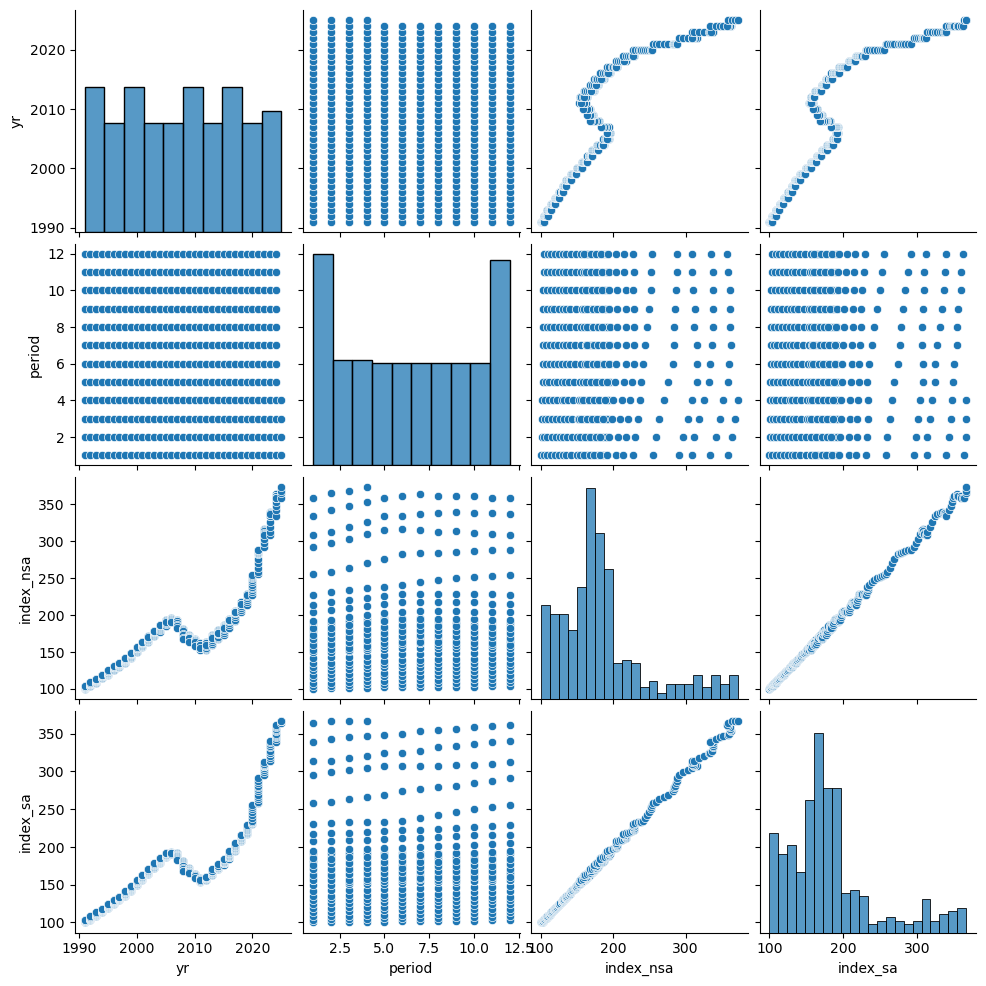

In [6]:
sns.pairplot(clean_hpi_data)

In [7]:
X = clean_hpi_data.drop("index_nsa", axis=1)
y= clean_hpi_data["index_nsa"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=42)

In [9]:
lin_model = LinearRegression()


In [10]:
lin_model.fit(X_train, y_train)

LinearRegression()

# National Home Average

In [11]:
National_avg_Home = home_prices_df.loc[:, "2000-01-31":].mean()
National_avg_Home

2000-01-31    110644.563729
2000-02-29    110829.212101
2000-03-31    110987.444475
2000-04-30    111697.110347
2000-05-31    112452.937688
                  ...      
2024-12-31    291991.869450
2025-01-31    292783.339336
2025-02-28    293471.866073
2025-03-31    293471.515502
2025-04-30    293140.573601
Length: 304, dtype: float64

In [12]:
fayetteville_prices = Fayetteville_home_price_DF.drop(columns=["RegionID", "SizeRank", "RegionName", "RegionType", "StateName"]).T
fayetteville_prices.columns = ["Price"]
fayetteville_prices.index = pd.to_datetime(fayetteville_prices.index)

In [13]:
def Home_Prices_National_vs_Fayetteville_graph():
    fayetteville_prices = Fayetteville_home_price_DF.drop(columns=["RegionID", "SizeRank", "RegionName", "RegionType", "StateName"]).T
    fayetteville_prices.columns = ["Price"]
    fayetteville_prices.index = pd.to_datetime(fayetteville_prices.index)
    National_avg_Home.index = pd.to_datetime(National_avg_Home.index)

    # Plot
    fig, ax = plt.subplots()
    # fig, ax = plt.subplots(figsize=(16, 7))
    ax.plot(fayetteville_prices.index, fayetteville_prices["Price"], label="Fayetteville, NC")
    ax.plot(National_avg_Home.index, National_avg_Home, label="National Average")

    ax.set_title("Fayetteville VS National Average Price Change Over 25 Years")
    ax.set_xlabel("Date")
    ax.set_ylabel("Price in USD")
    ax.legend()
    plt.tight_layout()
    ax.set_ylim(bottom=0)
    plt.show()


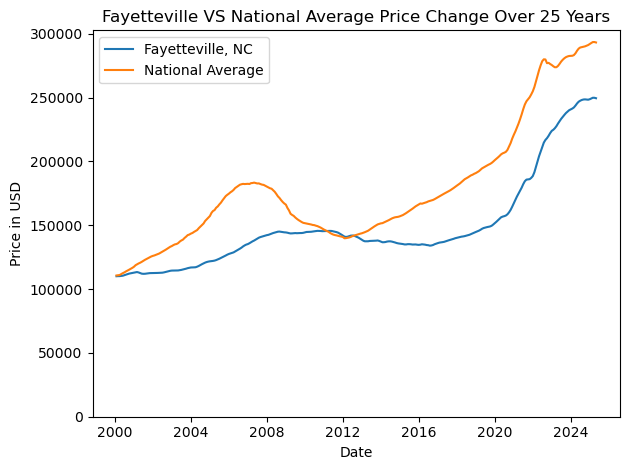

In [14]:
Home_Prices_National_vs_Fayetteville_graph()

# Step Two
Establish defining moments in the last 25 years that are either economic downturns or international conlfict and overlay with above graph

1. 9/11 Attacks and War on Terror (2001–2011)
Event: Terrorist attacks (Sep 11, 2001) → U.S. invaded Afghanistan (2001) and Iraq (2003)

Impact:

Surge in defense spending

Fed cut interest rates drastically

Housing prices began to rise post-recession

Military bases (like Fort Liberty near Fayetteville) expanded activity

Real Estate: Boost in demand near military hubs

2. Global Financial Crisis (2007–2009)
Event: U.S. mortgage meltdown triggered global recession

Impact:

Massive job loss, home foreclosures

Fed interest rates dropped to near zero

FHA/VA loan programs expanded

Real Estate: Prices plummeted; military towns often saw less damage than urban markets

3. Arab Spring & Oil Shocks (2011–2014)
Event: Regional uprisings in the Middle East & North Africa destabilized oil supply

Impact:

Gas prices rose sharply

Modest inflation pressure

Increased U.S. military deployment

Real Estate: Higher commuting costs hurt suburbs; military town economies grew

4. Russia-Ukraine Tensions Begin (2014)
Event: Russia annexed Crimea

Impact:

U.S. imposed sanctions

NATO military readiness increased

Real Estate: Little short-term impact, but Fort Liberty deployment volume rose

5. U.S.-China Trade War (2018–2019)
Event: U.S. imposed tariffs on hundreds of billions in Chinese goods

Impact:

Supply chain volatility

Manufacturing and farm exports hit

Fed paused rate hikes due to uncertainty

Real Estate: Stock market volatility dampened luxury housing, but rates stayed low

6. COVID-19 Pandemic & Global Lockdowns (2020–2022)
Event: Global health crisis → widespread economic shutdowns

Impact:

Fed rates dropped to 0%

Stimulus payments & record-low mortgage rates

Massive remote work shift

Real Estate: Home prices skyrocketed (esp. in suburban and military towns like Fayetteville)

7. Russia Invasion of Ukraine (2022–Present)
Event: Full-scale war triggered energy, grain, and supply chain crises

Impact:

Global inflation

U.S. interest rates hiked rapidly (to fight inflation)

Defense spending increased

Real Estate: Mortgage rates surged → cooling market despite high demand

8. Israel–Hamas Conflict Resurgence (2023–Present)
Event: Major regional instability risk in Middle East

Impact:

Elevated oil/gas price risks

Safe-haven capital inflows to U.S.

Real Estate: Higher borrowing costs + inflation hurt affordability

9. Rising U.S.–China Tensions (Ongoing)
Event: Taiwan, chip exports, South China Sea, trade restrictions

Impact:

Long-term reshoring and supply chain shifts

Uncertainty in global capital markets

Real Estate: Could influence military expansion, industrial real estate, and base-adjacent housing

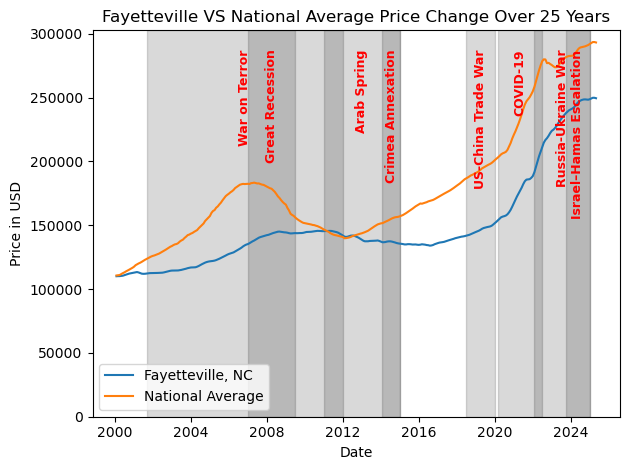

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

def Home_Prices_National_vs_Fayetteville_graph():
    # Prepare data
    fayetteville_prices = Fayetteville_home_price_DF.drop(columns=["RegionID", "SizeRank", "RegionName", "RegionType", "StateName"]).T
    fayetteville_prices.columns = ["Price"]
    fayetteville_prices.index = pd.to_datetime(fayetteville_prices.index)
    National_avg_Home.index = pd.to_datetime(National_avg_Home.index)

    # Plot
    fig, ax = plt.subplots()
    ax.plot(fayetteville_prices.index, fayetteville_prices["Price"], label="Fayetteville, NC")
    ax.plot(National_avg_Home.index, National_avg_Home, label="National Average")

    # Conflict periods and labels
    conflict_periods = [
        ("2001-09-01", "2011-12-31", "War on Terror"),
        ("2007-01-01", "2009-06-30", "Great Recession"),
        ("2011-01-01", "2014-12-31", "Arab Spring"),
        ("2014-02-01", "2014-12-31", "Crimea Annexation"),
        ("2018-07-01", "2019-12-31", "US-China Trade War"),
        ("2020-03-01", "2022-06-30", "COVID-19"),
        ("2022-02-01", "2025-01-01", "Russia-Ukraine War"),
        ("2023-10-01", "2025-01-01", "Israel–Hamas Escalation"),
    ]

    max_price = max(fayetteville_prices["Price"].max(), National_avg_Home.max())

#    Conflict periods
    for start, end, label in conflict_periods:
        start_date = pd.to_datetime(start)
        end_date = pd.to_datetime(end)
        ax.axvspan(start_date, end_date, color='black', alpha=0.15)
        mid_date = start_date + (end_date - start_date) / 2
        ax.text(mid_date, max_price * 0.98, label, rotation=90, ha='center',
                va='top', fontsize=9, color='Red', fontweight='bold')

    ax.set_title("Fayetteville VS National Average Price Change Over 25 Years")
    ax.set_xlabel("Date")
    ax.set_ylabel("Price in USD")
    ax.legend()
    ax.set_ylim(bottom=0)
    plt.tight_layout()
    # plt.show()

Home_Prices_National_vs_Fayetteville_graph()

# Import US home sales data count

Establish transaction volume during the periods of conflict

In [16]:
home_sales_count = pd.read_csv("Sold_Homes_US.csv")
home_sales_count

,RegionID,SizeRank,RegionName,RegionType,StateName,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,...,2024-08-31,2024-09-30,2024-10-31,2024-11-30,2024-12-31,2025-01-31,2025-02-28,2025-03-31,2025-04-30,2025-05-31
0,102001,0,United States,country,NaN,202165.0,233939.0,259717.0,286361.0,299608.0,...,337987.0,291122.0,311937.0,269951.0,277859.0,223553.0,230397.0,282687.0,314828.0,340002.0
1,394913,1,"New York, NY",msa,NY,8558.0,9061.0,10074.0,10477.0,11380.0,...,14515.0,12174.0,12473.0,11060.0,12338.0,10667.0,8889.0,10377.0,10762.0,11668.0
2,753899,2,"Los Angeles, CA",msa,CA,4137.0,5039.0,6075.0,6865.0,7226.0,...,6809.0,5878.0,6669.0,5684.0,5920.0,4529.0,5214.0,6135.0,6933.0,6566.0
3,394463,3,"Chicago, IL",msa,IL,5553.0,6898.0,7208.0,7921.0,8754.0,...,9972.0,8319.0,8527.0,7602.0,7479.0,6082.0,5979.0,7479.0,8737.0,9691.0
4,394514,4,"Dallas, TX",msa,TX,4881.0,5537.0,5974.0,6658.0,6670.0,...,6518.0,5557.0,6052.0,5171.0,5425.0,4213.0,4991.0,6145.0,6598.0,5433.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,395006,92,"Provo, UT",msa,UT,272.0,278.0,347.0,362.0,347.0,...,658.0,583.0,546.0,534.0,504.0,389.0,492.0,578.0,659.0,748.0
90,395160,93,"Toledo, OH",msa,OH,326.0,359.0,426.0,475.0,474.0,...,697.0,597.0,618.0,511.0,572.0,423.0,435.0,472.0,586.0,579.0
91,395224,94,"Wichita, KS",msa,KS,543.0,718.0,728.0,787.0,813.0,...,692.0,582.0,605.0,562.0,548.0,427.0,444.0,533.0,617.0,806.0
92,394549,95,"Durham, NC",msa,NC,416.0,515.0,553.0,781.0,777.0,...,621.0,609.0,613.0,532.0,544.0,471.0,497.0,646.0,783.0,863.0


In [17]:

home_sales_count

Fayetteville_home_sales_count = home_sales_count[(home_prices_df["StateName"] == "NC")]
# df = Fayetteville_home_sales_count.drop(columns=["RegionID", "SizeRank", 'RegionName', "RegionType", "StateName"])
Fayetteville_home_sales_count


C:\Users\Pete\AppData\Local\Temp\ipykernel_39476\4269980580.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fayetteville_home_sales_count = home_sales_count[(home_prices_df["StateName"] == "NC")]


,RegionID,SizeRank,RegionName,RegionType,StateName,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,...,2024-08-31,2024-09-30,2024-10-31,2024-11-30,2024-12-31,2025-01-31,2025-02-28,2025-03-31,2025-04-30,2025-05-31
23,394458,23,"Charlotte, NC",msa,NC,2399.0,2599.0,2843.0,2944.0,2960.0,...,3517.0,2937.0,3107.0,2772.0,2924.0,2400.0,2545.0,3276.0,3554.0,3704.0
42,395012,43,"Raleigh, NC",msa,NC,1139.0,1276.0,1373.0,1468.0,1462.0,...,1519.0,1264.0,1487.0,1266.0,1293.0,1106.0,1163.0,1491.0,1580.0,1811.0
74,394648,76,"Greensboro, NC",msa,NC,673.0,715.0,705.0,772.0,858.0,...,874.0,773.0,829.0,726.0,759.0,694.0,625.0,817.0,922.0,1017.0
86,395235,89,"Winston, NC",msa,NC,562.0,546.0,621.0,675.0,757.0,...,784.0,683.0,760.0,696.0,676.0,584.0,626.0,742.0,844.0,896.0
92,394549,95,"Durham, NC",msa,NC,416.0,515.0,553.0,781.0,777.0,...,621.0,609.0,613.0,532.0,544.0,471.0,497.0,646.0,783.0,863.0


In [18]:
Fay_mean_sales_by_month = Fayetteville_home_sales_count.mean(axis=0, numeric_only=True).to_frame().T
Fay_mean_sales_by_month

,RegionID,SizeRank,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,...,2024-08-31,2024-09-30,2024-10-31,2024-11-30,2024-12-31,2025-01-31,2025-02-28,2025-03-31,2025-04-30,2025-05-31
0,394780.4,65.2,1037.8,1130.2,1219.0,1328.0,1362.8,1267.4,1132.4,1014.2,...,1463.0,1253.2,1359.2,1198.4,1239.2,1051.0,1091.2,1394.4,1536.6,1658.2


In [19]:

Fay_mean_sales_by_month = Fay_mean_sales_by_month.drop(["RegionID", "SizeRank"], axis=1)


In [20]:
Fay_mean_sales_by_month.columns = pd.to_datetime(Fay_mean_sales_by_month.columns, )

In [21]:
Fay_mean_sales_by_month.columns.dtype

dtype('<M8[ns]')

In [22]:
# Fay_mean_sales_by_month = Fay_mean_sales_by_month.T

In [23]:
test_df = Fay_mean_sales_by_month.T

In [24]:
Fay_mean_sales_by_month_T = Fay_mean_sales_by_month.T

# Step 2: Reset index to make dates a column
Fay_mean_sales_by_month_T = Fay_mean_sales_by_month_T.reset_index()
Fay_mean_sales_by_month_T.columns = ['Date', 'Sales Per Month']  # Rename columns


In [25]:
Fay_mean_sales_by_month_T.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             208 non-null    datetime64[ns]
 1   Sales Per Month  208 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [26]:
Fay_mean_sales_by_month_T

,Date,Sales Per Month
0,2008-02-29,1037.8
1,2008-03-31,1130.2
2,2008-04-30,1219.0
3,2008-05-31,1328.0
4,2008-06-30,1362.8
...,...,...
203,2025-01-31,1051.0
204,2025-02-28,1091.2
205,2025-03-31,1394.4
206,2025-04-30,1536.6


# Sales volume by month

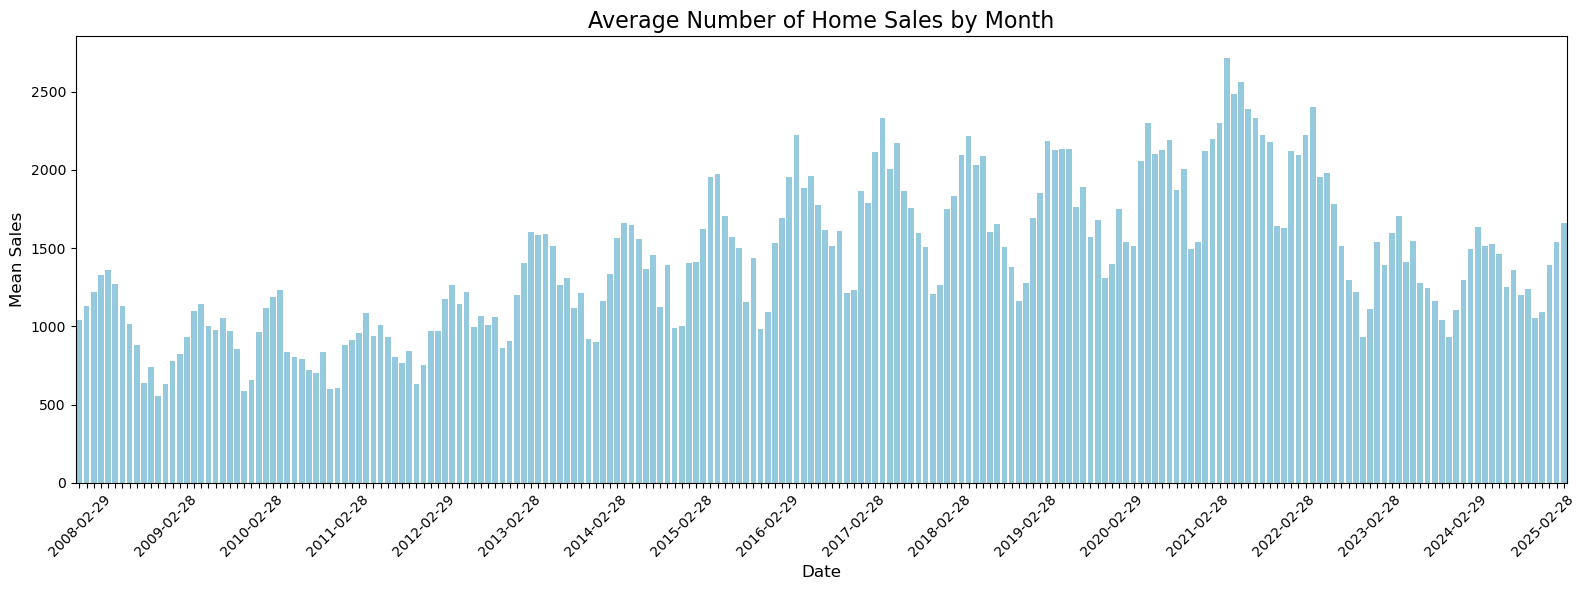

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 1: Plot Barplot and capture ax
fig, ax = plt.subplots(figsize=(16, 6))
sns.barplot(data=Fay_mean_sales_by_month_T, x='Date', y='Sales Per Month', color='skyblue', ax=ax)

# Step 2: Show every 12th x-axis label
labels = ax.get_xticklabels()
for i, label in enumerate(labels):
    if i % 12 != 0:  # Every 12th label (~1 per year if monthly data)
        label.set_visible(False)
ax.tick_params(axis='x', rotation=45)



# Step 4: Titles and Layout
ax.set_title('Average Number of Home Sales by Month', fontsize=16)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Mean Sales', fontsize=12)

plt.tight_layout()
plt.show()

# Sales per month with shading

In [28]:
Fay_mean_sales_by_month

,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,2008-10-31,2008-11-30,...,2024-08-31,2024-09-30,2024-10-31,2024-11-30,2024-12-31,2025-01-31,2025-02-28,2025-03-31,2025-04-30,2025-05-31
0,1037.8,1130.2,1219.0,1328.0,1362.8,1267.4,1132.4,1014.2,881.0,638.6,...,1463.0,1253.2,1359.2,1198.4,1239.2,1051.0,1091.2,1394.4,1536.6,1658.2


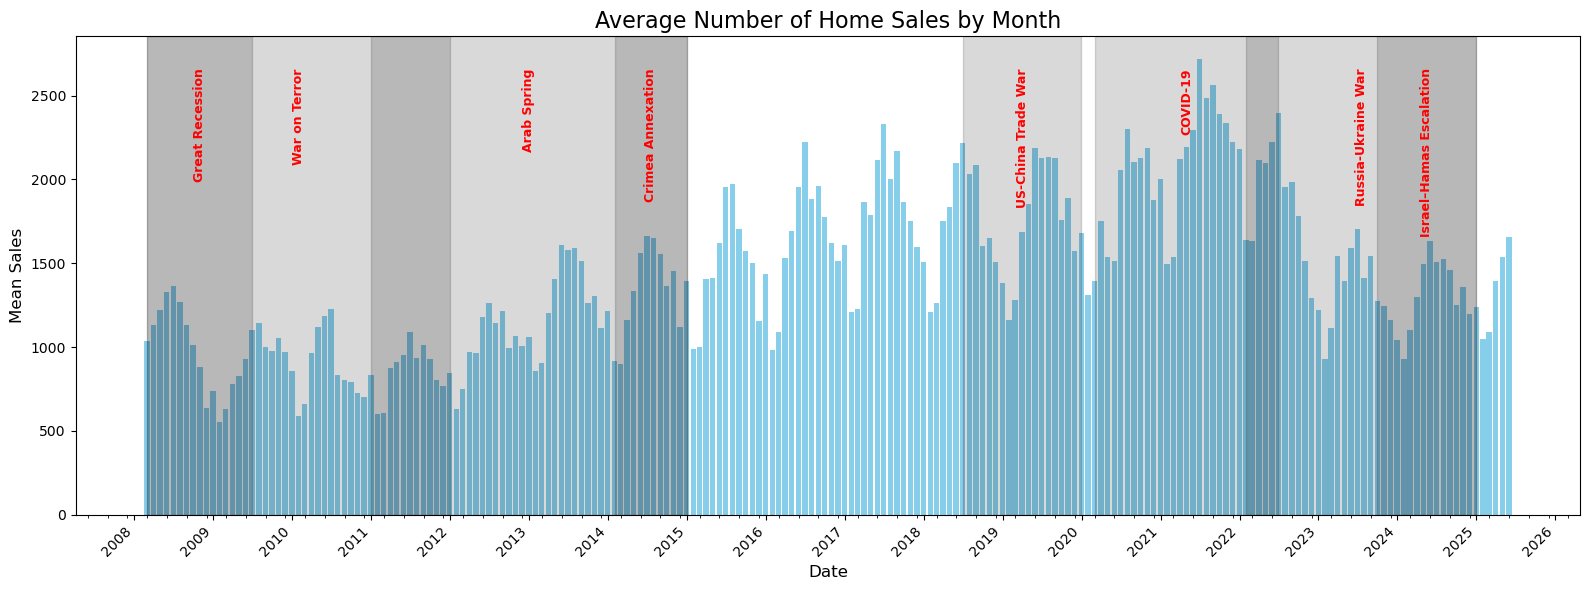

In [29]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(16, 6))

# Plot with proper bar width (~1 month)
ax.bar(Fay_mean_sales_by_month_T['Date'], 
       Fay_mean_sales_by_month_T['Sales Per Month'], 
       color='skyblue', 
       width=pd.Timedelta(days=25))   # << KEY FIX

# Set major ticks to every year (adjust to every 6 months if needed)
ax.xaxis.set_major_locator(mdates.YearLocator(1))   # One tick per year
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Optional: Minor ticks (every 3 months for example)
ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=3))

# Rotate labels for clarity
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

# Every 12th label
labels = ax.get_xticklabels()
for i, label in enumerate(labels):
    if i % 1 != 0:
        label.set_visible(False)
ax.tick_params(axis='x', rotation=45)

# Add Shading (as you already did)
max_sales = Fay_mean_sales_by_month_T['Sales Per Month'].max()

conflict_periods_2 = [
    ("2008-02-29", "2011-12-31", "War on Terror"),
    ("2008-02-29", "2009-06-30", "Great Recession"),
    ("2011-01-01", "2014-12-31", "Arab Spring"),
    ("2014-02-01", "2014-12-31", "Crimea Annexation"),
    ("2018-07-01", "2019-12-31", "US-China Trade War"),
    ("2020-03-01", "2022-06-30", "COVID-19"),
    ("2022-02-01", "2025-01-01", "Russia-Ukraine War"),
    ("2023-10-01", "2025-01-01", "Israel–Hamas Escalation")]

for start, end, label_text in conflict_periods_2:
    start_date = pd.to_datetime(start)
    end_date = pd.to_datetime(end)
    ax.axvspan(start_date, end_date, color='black', alpha=0.15)
    mid_date = start_date + (end_date - start_date) / 2
    ax.text(mid_date, max_sales * 0.98, label_text, rotation=90, ha='center',
            va='top', fontsize=9, color='red', fontweight='bold')

ax.set_title('Average Number of Home Sales by Month', fontsize=16)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Mean Sales', fontsize=12)

plt.tight_layout()
plt.show()


In [30]:
#     # Prepare data
# Fayetteville_home_sales_count = Fayetteville_home_sales_count.drop(columns=["RegionID", "SizeRank", "RegionType", "StateName"]).T
# # Fayetteville_home_sales_count.columns = ["Count"]
# Fayetteville_home_sales_count.index = pd.to_datetime(Fayetteville_home_sales_count.index)
# # National_avg_Home.index = pd.to_datetime(National_avg_Home.index)

# # Plot
# fig, ax = plt.subplots(figsize=(16, 7))
# ax.plot(Fayetteville_home_sales_count.index, Fayetteville_home_sales_count["Count"], label="Fayetteville, NC")
# # ax.plot(National_avg_Home.index, National_avg_Home, label="National Average")

In [31]:
fayetteville_row = home_prices_df[(home_prices_df["StateName"] == "NC") & (home_prices_df["RegionName"] == "Fayetteville, NC")]

# Step Three
Estbalish Linear Prediction modeling implying conflict and no conflict to compare the outcome in 2025--> 

# Step Three A
Reorganize data to be understandable, change to average price per year format

In [32]:
clean_df = Fayetteville_home_price_DF.drop(["RegionID", "SizeRank", "RegionName", "StateName", "RegionType"], axis=1).T
cleaner_df = clean_df.reset_index()
df = cleaner_df.rename(columns={106: 'price', 'index': 'Date'})
df['Date'] = pd.to_datetime(df['Date'])                   
df["year"] = df['Date'].dt.year


In [33]:
annual_avg = df.groupby('year')['price'].mean().reset_index()

In [34]:
annual_avg.head(5)

,year,price
0,2000,111241.556808
1,2001,112500.738237
2,2002,113253.513731
3,2003,115381.615469
4,2004,119172.822990


In [35]:
# sns.lineplot(x='Date', y='price', data=df, marker='o')
# labels = ax.get_xticklabels()
# for i, label in enumerate(labels):
#     if i % 12 != 0:  # Every 12th label (~1 per year if monthly data)
#         label.set_visible(False)
# ax.tick_params(axis='x', rotation=45)
# plt.title("Fayetteville Average Home Price by Year")
# plt.xlabel("Date")
# plt.ylabel("Average Home Price")

# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

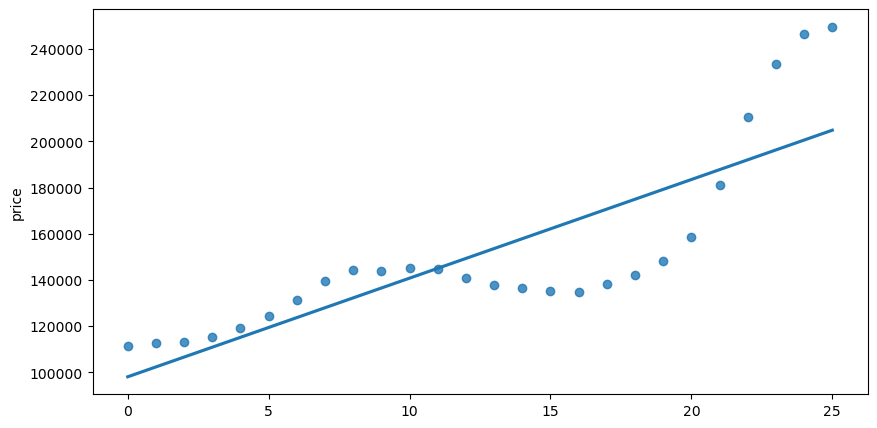

In [36]:
x = annual_avg["year"]
y=annual_avg["price"]

plt.figure(figsize=(10, 5))
ax = sns.regplot(x=np.arange(len(x)), y=y, scatter=True, ci=None)

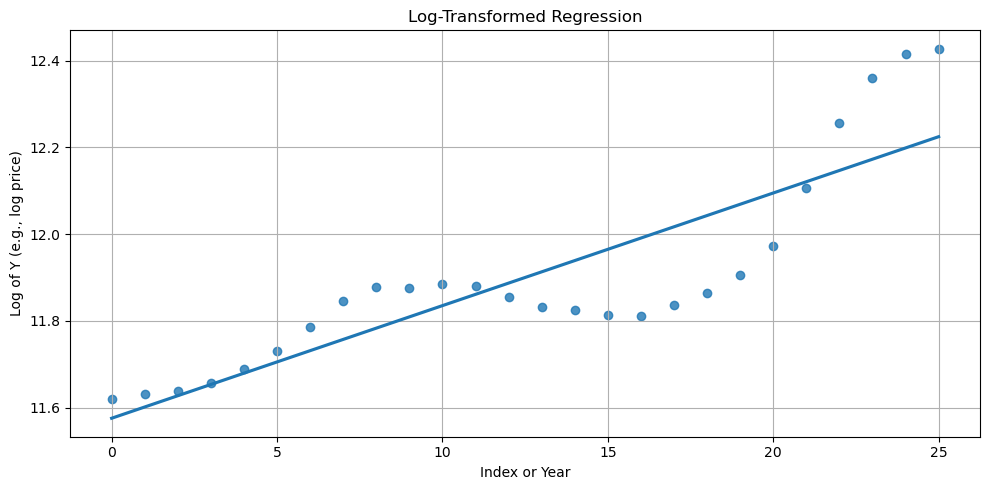

In [37]:
y_log = np.log(y)

plt.figure(figsize=(10, 5))
sns.regplot(x=np.arange(len(x)), y=y_log, scatter=True, ci=None)
plt.title("Log-Transformed Regression")
plt.xlabel("Index or Year")
plt.ylabel("Log of Y (e.g., log price)")
plt.grid(True)
plt.tight_layout()
plt.show()

# C Fund Returns = US Stock Market

In [38]:
c_fund_returns = pd.read_excel("C Fund returns.xlsx")

In [39]:
c_fund_returns

,Date,Returns
0,NaN,NaN
1,May,0.0629
2,April,-0.0068
3,March,-0.0564
4,February,-0.0130
...,...,...
326,May,-0.0205
327,April,-0.0298
328,March,0.0974
329,2000-02-01 00:00:00,-0.0193


In [40]:


# Clean % sign and convert to float
c_fund_returns['Returns'] = c_fund_returns['Returns'].replace('%', '').astype(float)

# Function to standardize the date
def parse_date(val):
    try:
        # Try to parse mm/yy or m/yy
        return pd.to_datetime(val, format='%m/%y')
    except:
        try:
            return pd.to_datetime(val, format='%m/%Y')
        except:
            # Assume it's a month name, assign it to a fallback year
            return pd.to_datetime(val + ' 2024', format='%B %Y')  # Change year as needed

# Apply date conversion
c_fund_returns['Date'] = c_fund_returns['Date'].apply(parse_date)

# Sort the data by date
c_fund_returns = df.sort_values('Date')



# US Average Mortgage Rate

In [41]:
fayetteville_prices

,Price
2000-01-31,110032.240834
2000-02-29,110125.173759
2000-03-31,110134.341123
2000-04-30,110255.541057
2000-05-31,110448.087436
...,...
2024-12-31,248696.647110
2025-01-31,249281.637733
2025-02-28,249836.910300
2025-03-31,249809.174126


In [42]:
mortgage_data = pd.read_csv("mortgage_rates.csv")

In [43]:
mortgage_data

,observation_date,MORTGAGE30US
0,2000-01-07,8.15
1,2000-01-14,8.18
2,2000-01-21,8.26
3,2000-01-28,8.25
4,2000-02-04,8.25
...,...,...
1325,2025-05-29,6.89
1326,2025-06-05,6.85
1327,2025-06-12,6.84
1328,2025-06-18,6.81


In [44]:
rates_and_cost = pd.concat([mortgage_data, fayetteville_prices], ignore_index=True)

In [45]:
mortgage_data

,observation_date,MORTGAGE30US
0,2000-01-07,8.15
1,2000-01-14,8.18
2,2000-01-21,8.26
3,2000-01-28,8.25
4,2000-02-04,8.25
...,...,...
1325,2025-05-29,6.89
1326,2025-06-05,6.85
1327,2025-06-12,6.84
1328,2025-06-18,6.81


In [46]:
import pandas as pd
import matplotlib.pyplot as plt

def Home_Prices_National_vs_Fayetteville_graph():
    # Prepare data
    fayetteville_prices = Fayetteville_home_price_DF.drop(columns=["RegionID", "SizeRank", "RegionName", "RegionType", "StateName"]).T
    fayetteville_prices.columns = ["Price"]
    fayetteville_prices.index = pd.to_datetime(fayetteville_prices.index)
    National_avg_Home.index = pd.to_datetime(National_avg_Home.index)
    
    # Fayetteville sales to datetime
    # Fay_mean_sales_by_month_T = Fay_mean_sales_by_month_T.reset_index()
    # Fay_mean_sales_by_month_T.columns = ['Date', 'Sales Per Month']  # Rename columns

    # Plot Fayetteville and National Average Home Prices
    fig, ax = plt.subplots(figsize=(16, 7))
    ax.plot(fayetteville_prices.index, fayetteville_prices["Price"], label="Fayetteville, NC")
    ax.plot(National_avg_Home.index, National_avg_Home, label="National Average")

    # Creating the sales volume as secondary y-axis
    x2=ax.twinx()
    xticks= x2.get_xticks()
    x2.set_xticks(xticks)
    sns.barplot(data=Fay_mean_sales_by_month_T, x='Date', y='Sales Per Month', color='skyblue', ax=x2)
    # # labels = ax.set_xticks

    # for i, label in enumerate(labels):
    #     if i % 24 != 0:
    #         label.set_visible(False)

    # Conflict periods and labels
    conflict_periods = [
        ("2001-09-01", "2011-12-31", "War on Terror"),
        ("2007-01-01", "2009-06-30", "Great Recession"),
        ("2011-01-01", "2014-12-31", "Arab Spring"),
        ("2014-02-01", "2014-12-31", "Crimea Annexation"),
        ("2018-07-01", "2019-12-31", "US-China Trade War"),
        ("2020-03-01", "2022-06-30", "COVID-19"),
        ("2022-02-01", "2025-01-01", "Russia-Ukraine War"),
        ("2023-10-01", "2025-01-01", "Israel–Hamas Escalation"),
    ]

    max_price = max(fayetteville_prices["Price"].max(), National_avg_Home.max())

#    Conflict periods
    for start, end, label in conflict_periods:
        start_date = pd.to_datetime(start)
        end_date = pd.to_datetime(end)
        ax.axvspan(start_date, end_date, color='black', alpha=0.15)
        mid_date = start_date + (end_date - start_date) / 2
        ax.text(mid_date, max_price * 0.98, label, rotation=90, ha='center',
                va='top', fontsize=9, color='Red', fontweight='bold')

    ax.set_title("Fayetteville VS National Average Price Change Over 25 Years")
    ax.set_xlabel("Date")
    ax.set_ylabel("Price in USD")
    ax.legend()
    ax.set_ylim(bottom=0)
    plt.tight_layout()
    # plt.show()

# Home_Prices_National_vs_Fayetteville_graph()

# Predictive Modeling for house prices based on conflict or not

* Datasets to pull from:
1. df = average prices in Fayetteville by month
2. annual_avg - average prices in Fayetteville by year 
3. mortgage_data = mortgage interest rate 30 year fixed by month since Jan 2000
4. Fay_mean_sales_by_month = transaction volume broked down by month since Feb 2008
* top 2 adjusted due to availability of comparitive data

* conflict_periods_2 = [
    
    ("2008-02-29", "2011-12-31", "War on Terror"),
    
    ("2008-02-29", "2009-06-30", "Great Recession"),
    
    ("2011-01-01", "2014-12-31", "Arab Spring"),
    
    ("2014-02-01", "2014-12-31", "Crimea Annexation"),
    
    ("2018-07-01", "2019-12-31", "US-China Trade War"),
    
    ("2020-03-01", "2022-06-30", "COVID-19"),
    
    ("2022-02-01", "2025-01-01", "Russia-Ukraine War"),
    
    ("2023-10-01", "2025-01-01", "Israel–Hamas Escalation")]





In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    304 non-null    datetime64[ns]
 1   price   304 non-null    float64       
 2   year    304 non-null    int32         
dtypes: datetime64[ns](1), float64(1), int32(1)
memory usage: 6.1 KB


In [48]:
Fay_mean_sales_by_month

,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,2008-10-31,2008-11-30,...,2024-08-31,2024-09-30,2024-10-31,2024-11-30,2024-12-31,2025-01-31,2025-02-28,2025-03-31,2025-04-30,2025-05-31
0,1037.8,1130.2,1219.0,1328.0,1362.8,1267.4,1132.4,1014.2,881.0,638.6,...,1463.0,1253.2,1359.2,1198.4,1239.2,1051.0,1091.2,1394.4,1536.6,1658.2


In [49]:
Fay_mean_sales_by_month = Fay_mean_sales_by_month.T
Fay_mean_sales_by_month


,0
2008-02-29,1037.8
2008-03-31,1130.2
2008-04-30,1219.0
2008-05-31,1328.0
2008-06-30,1362.8
...,...
2025-01-31,1051.0
2025-02-28,1091.2
2025-03-31,1394.4
2025-04-30,1536.6


In [50]:
Fay_mean_sales_by_month = Fay_mean_sales_by_month.reset_index()
Fay_mean_sales_by_month.columns = ['Date', 'Sales_Volume']

In [51]:
Fay_mean_sales_by_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          208 non-null    datetime64[ns]
 1   Sales_Volume  208 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [52]:
mortgage_data['observation_date'] = pd.to_datetime(mortgage_data['observation_date'])

mortgage_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   observation_date  1330 non-null   datetime64[ns]
 1   MORTGAGE30US      1330 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 20.9 KB


In [53]:
mortgage_data.rename(columns={'observation_date': 'Date'}, inplace=True)

In [54]:
mortgage_data

,Date,MORTGAGE30US
0,2000-01-07,8.15
1,2000-01-14,8.18
2,2000-01-21,8.26
3,2000-01-28,8.25
4,2000-02-04,8.25
...,...,...
1325,2025-05-29,6.89
1326,2025-06-05,6.85
1327,2025-06-12,6.84
1328,2025-06-18,6.81


# Concat all relevent frames into a single frame

In [55]:
print(df.columns)
print(mortgage_data.columns)
print(Fay_mean_sales_by_month.columns)

Index(['Date', 'price', 'year'], dtype='object')
Index(['Date', 'MORTGAGE30US'], dtype='object')
Index(['Date', 'Sales_Volume'], dtype='object')


In [56]:
combined_df = df.merge(mortgage_data, on='Date', how='outer')\
                .merge(Fay_mean_sales_by_month, on='Date', how='outer')

# combined_df = combined_df.drop('index', axis=1)

combined_df

,Date,price,year,MORTGAGE30US,Sales_Volume
0,2000-01-07,NaN,NaN,8.15,NaN
1,2000-01-14,NaN,NaN,8.18,NaN
2,2000-01-21,NaN,NaN,8.26,NaN
3,2000-01-28,NaN,NaN,8.25,NaN
4,2000-01-31,110032.240834,2000.0,NaN,NaN
...,...,...,...,...,...
1582,2025-05-31,NaN,NaN,NaN,1658.2
1583,2025-06-05,NaN,NaN,6.85,NaN
1584,2025-06-12,NaN,NaN,6.84,NaN
1585,2025-06-18,NaN,NaN,6.81,NaN


In [57]:
# Make sure you have a 'year' column
combined_df['year'] = combined_df['Date'].dt.year

# Fill NaN in SalesVolume with mean SalesVolume of that year
combined_df['Sales_Volume'] = combined_df.groupby('year')['Sales_Volume']\
    .transform(lambda x: x.fillna(x.mean()))

In [58]:
combined_df

,Date,price,year,MORTGAGE30US,Sales_Volume
0,2000-01-07,NaN,2000,8.15,NaN
1,2000-01-14,NaN,2000,8.18,NaN
2,2000-01-21,NaN,2000,8.26,NaN
3,2000-01-28,NaN,2000,8.25,NaN
4,2000-01-31,110032.240834,2000,NaN,NaN
...,...,...,...,...,...
1582,2025-05-31,NaN,2025,NaN,1658.20
1583,2025-06-05,NaN,2025,6.85,1346.28
1584,2025-06-12,NaN,2025,6.84,1346.28
1585,2025-06-18,NaN,2025,6.81,1346.28


# Filling in the NaN values with that years averages

In [59]:
combined_df['price'] = combined_df.groupby('year')['price'].transform(lambda x: x.fillna(x.mean()))

In [60]:
combined_df['MORTGAGE30US'] = combined_df.groupby('year')['MORTGAGE30US'].transform(lambda x: x.fillna(x.mean()))

In [61]:
#  1 = Economic 
#  2 = US War
#  3 = International Conlfict

conflict_periods_years = [
    (2008, 2009, 1),  # Great Recession → Economic
    (2008, 2011, 2),  # War on Terror → US War
    (2011, 2014, 3),  # Arab Spring → International Conflict
    (2014, 2014, 3),  # Crimea Annexation → International Conflict
    (2018, 2019, 1),  # US-China Trade War → Economic
    (2020, 2022, 1),  # COVID → Economic
    (2022, 2025, 3),  # Russia-Ukraine → International Conflict
    (2023, 2025, 3)   # Israel–Hamas → International Conflict
]


# Ensure you have a 'year' column
combined_df['year'] = combined_df['Date'].dt.year

# Initialize the conflict column with default value, e.g. 0 (no conflict)
combined_df['conflict_type'] = 0

# Iterate over conflict periods and assign codes
for start_year, end_year, code in conflict_periods_years:
    mask = (combined_df['year'] >= start_year) & (combined_df['year'] <= end_year)
    combined_df.loc[mask, 'conflict_type'] = code

# Final Date Frame

In [62]:
combined_df_post_2008_with_sales_volume = combined_df[combined_df['Date'] >= '2008-06-30']

In [63]:
combined_df_post_2008_with_sales_volume.head(2)

,Date,price,year,MORTGAGE30US,Sales_Volume,conflict_type
528,2008-06-30,144602.863107,2008,6.02717,1362.800000,2
529,2008-07-03,144137.477366,2008,6.35000,1068.018182,2


In [64]:
combined_df_no_sales_volume = combined_df[combined_df['Date'] <= '2008-06-30']
combined_df_no_sales_volume = combined_df_no_sales_volume.drop('Sales_Volume', axis = 1)

combined_df_no_sales_volume.head(2)

,Date,price,year,MORTGAGE30US,conflict_type
0,2000-01-07,111241.556808,2000,8.15,0
1,2000-01-14,111241.556808,2000,8.18,0


# Model 1 : Predictive Pricing 2008 --> 2025 with sales volume

In [65]:

# combined_post_2008_no_year = combined_df_post_2008_with_sales_volume.drop('year', axis=1)
combined_df_post_2008_with_sales_volume['Month'] = combined_df_post_2008_with_sales_volume['Date'].dt.month
combined_df_post_2008_with_sales_volume['Day'] = combined_df_post_2008_with_sales_volume['Date'].dt.day

combined_df_post_2008_with_sales_volume = combined_df_post_2008_with_sales_volume.drop('Date', axis = 1)



C:\Users\Pete\AppData\Local\Temp\ipykernel_39476\1700877221.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df_post_2008_with_sales_volume['Month'] = combined_df_post_2008_with_sales_volume['Date'].dt.month
C:\Users\Pete\AppData\Local\Temp\ipykernel_39476\1700877221.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df_post_2008_with_sales_volume['Day'] = combined_df_post_2008_with_sales_volume['Date'].dt.day


# The data frame with day / month/ year broken apart

In [66]:
combined_df_post_2008_with_sales_volume.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1059 entries, 528 to 1586
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          1059 non-null   float64
 1   year           1059 non-null   int32  
 2   MORTGAGE30US   1059 non-null   float64
 3   Sales_Volume   1059 non-null   float64
 4   conflict_type  1059 non-null   int64  
 5   Month          1059 non-null   int32  
 6   Day            1059 non-null   int32  
dtypes: float64(3), int32(3), int64(1)
memory usage: 53.8 KB


In [67]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd

In [68]:
X_sales_volume = combined_df_post_2008_with_sales_volume.drop('price', axis=1)
y_sales_volume = combined_df_post_2008_with_sales_volume['price']

In [69]:
X_volume_train, X_volume_test, y_volume_train, y_volume_test = train_test_split(X_sales_volume, y_sales_volume, test_size=.2)

# Final Dataframe

In [70]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1587 entries, 0 to 1586
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           1587 non-null   datetime64[ns]
 1   price          1587 non-null   float64       
 2   year           1587 non-null   int32         
 3   MORTGAGE30US   1587 non-null   float64       
 4   Sales_Volume   1089 non-null   float64       
 5   conflict_type  1587 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int32(1), int64(1)
memory usage: 68.3 KB


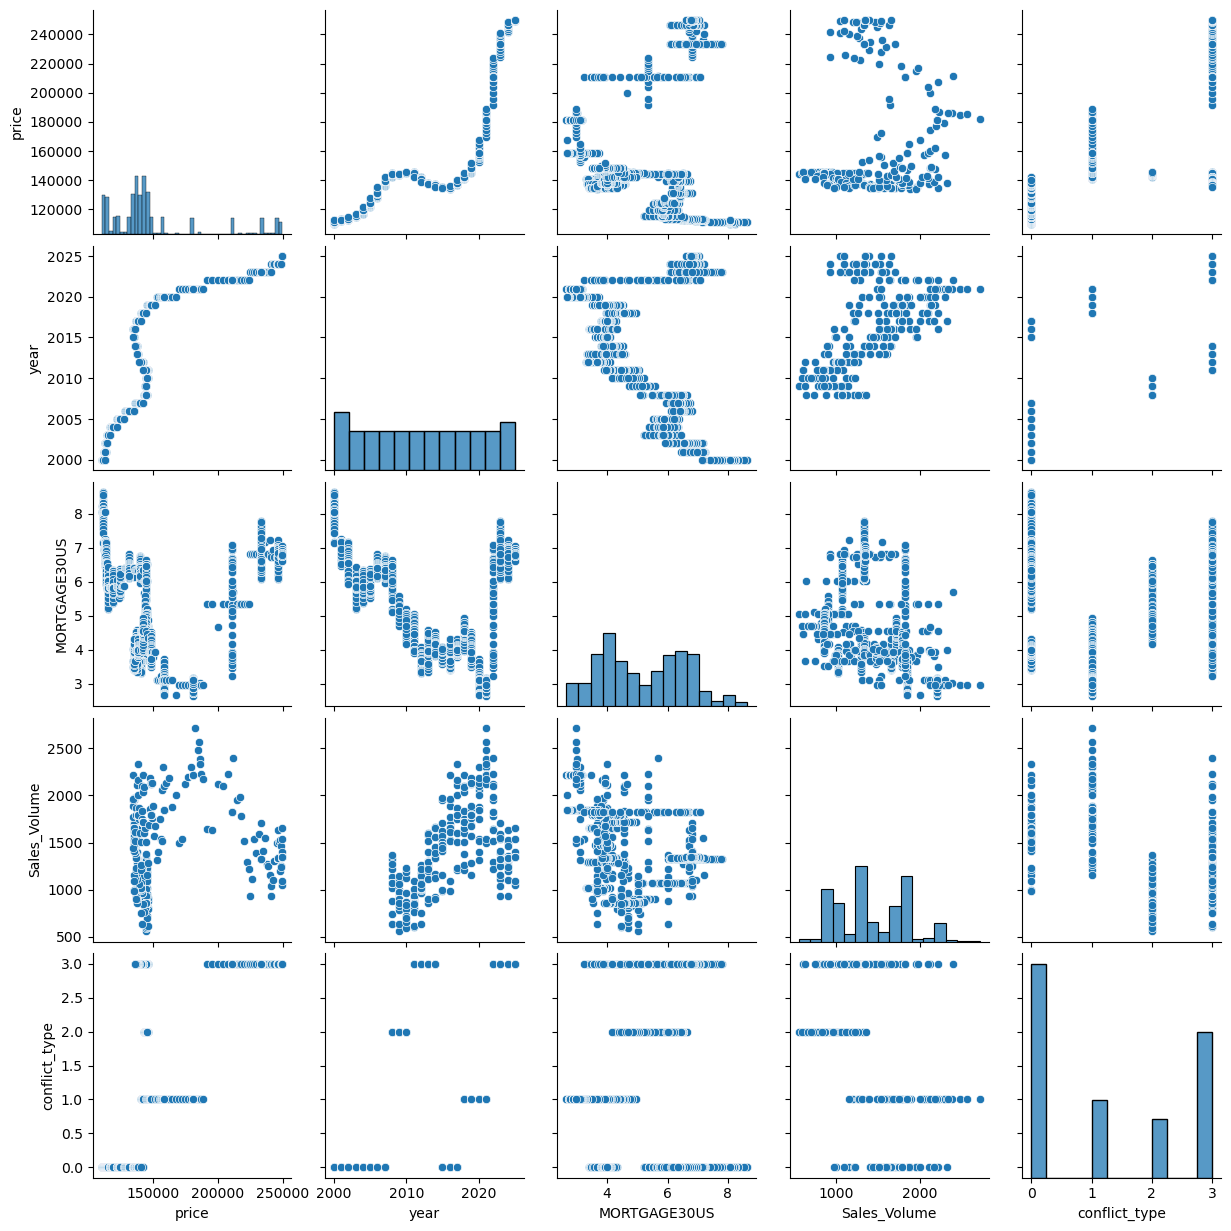

In [71]:
sns.pairplot(combined_df)

# Pipeline

In [72]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error

In [73]:
# combined_df_post_2008_with_sales_volume
# combined_post_2008_no_year = combined_df_post_2008_with_sales_volume.drop('year', axis=1)
combined_df_post_2008_with_sales_volume["Sales_Volume"].max()

2718.2

In [74]:
numeric_features = ['year', 'MORTGAGE30US', 'Sales_Volume']
categorical_features = ['conflict_type']


In [75]:
numeric_transformation = Pipeline([
    ('imputer', SimpleImputer(strategy= 'mean')),
    ('scaler', MinMaxScaler())
])

In [76]:
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

In [77]:
preprocessing = ColumnTransformer([
    ('num', numeric_transformation, numeric_features),
    ('cat', categorical_transformer, categorical_features)
], remainder='passthrough')

In [78]:
linear_price_model = Pipeline([
    ('preprocessing', preprocessing),
    ('classification', LinearRegression())
])

In [79]:
X_volume_train

,year,MORTGAGE30US,Sales_Volume,conflict_type,Month,Day
740,2011,4.447885,767.000000,3,11,30
886,2014,4.168868,1164.600000,3,3,31
1052,2016,4.080000,1652.716667,0,12,1
736,2011,4.000000,861.033333,3,11,3
582,2009,4.820000,902.250000,2,5,21
...,...,...,...,...,...,...
686,2011,4.710000,861.033333,3,1,13
1373,2022,3.550000,1821.650000,3,1,27
893,2014,4.210000,1340.300000,3,5,8
538,2008,6.027170,1132.400000,2,8,31


In [80]:
# combined_post_2008_no_year.info()

In [81]:
linear_price_model.fit(X_volume_train, y_volume_train)

c:\Users\Pete\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['year', 'MORTGAGE30US',
                                                   'Sales_Volume']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['conflict_type'])])),
                ('classification', LinearRegression())])

# Prediction 

In [82]:
linear_predictions = linear_price_model.predict(X_volume_test)

In [83]:

# mse = mean_squared_error(y_volume_test, linear_predictions)
mae = mean_absolute_error(y_volume_test, linear_predictions)
r2 = r2_score(y_volume_test, linear_predictions)
print("\n--- Evauluation ---")
# print("MSE:", mse)
print("R2:", r2)
print("MAE:", mae)


--- Evauluation ---
R2: 0.9539721478293193
MAE: 6333.462927810241


# Streamlit predictive model 
Create a streamlit platform that allows you to predict housing values by month based on international conflict and current housing prices / interest rates

# Streamlit Idea

sliding sale to predict home values based on:

- interest rate
- modeled appreciation 
- conflict
- year  

# Advanced Modeling

profit - specifically meant for time series and can caputre seasonality, requries a data time column and a price

In [84]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Dataframe

In [85]:
combined_df

,Date,price,year,MORTGAGE30US,Sales_Volume,conflict_type
0,2000-01-07,111241.556808,2000,8.150000,NaN,0
1,2000-01-14,111241.556808,2000,8.180000,NaN,0
2,2000-01-21,111241.556808,2000,8.260000,NaN,0
3,2000-01-28,111241.556808,2000,8.250000,NaN,0
4,2000-01-31,110032.240834,2000,8.053462,NaN,0
...,...,...,...,...,...,...
1582,2025-05-31,249599.058150,2025,6.808077,1658.20,3
1583,2025-06-05,249599.058150,2025,6.850000,1346.28,3
1584,2025-06-12,249599.058150,2025,6.840000,1346.28,3
1585,2025-06-18,249599.058150,2025,6.810000,1346.28,3


In [86]:
# combined_df.info()

prophet_df = combined_df[['Date', 'price']]

prophet_df['ds'] = prophet_df['Date']

prophet_df['y'] =  prophet_df['price']


C:\Users\Pete\AppData\Local\Temp\ipykernel_39476\3063024541.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prophet_df['ds'] = prophet_df['Date']
C:\Users\Pete\AppData\Local\Temp\ipykernel_39476\3063024541.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prophet_df['y'] =  prophet_df['price']


In [87]:

prophet_df = prophet_df.drop(['Date', 'price'], axis =1)



In [88]:
prophet_df

,ds,y
0,2000-01-07,111241.556808
1,2000-01-14,111241.556808
2,2000-01-21,111241.556808
3,2000-01-28,111241.556808
4,2000-01-31,110032.240834
...,...,...
1582,2025-05-31,249599.058150
1583,2025-06-05,249599.058150
1584,2025-06-12,249599.058150
1585,2025-06-18,249599.058150


In [89]:
model = Prophet(yearly_seasonality=True, weekly_seasonality=True,  daily_seasonality=False)

model.fit(prophet_df)

10:45:18 - cmdstanpy - INFO - Chain [1] start processing
10:45:19 - cmdstanpy - INFO - Chain [1] done processing


In [90]:
prophet_df.describe()

,ds,y
count,1587,1587.000000
mean,2012-10-03 13:48:25.860113408,149508.019052
min,2000-01-07 00:00:00,110032.240834
25%,2006-05-21 12:00:00,131420.568125
50%,2012-09-30 00:00:00,139485.705329
75%,2019-02-17 12:00:00,148198.979306
max,2025-06-26 00:00:00,249836.910300
std,NaN,36849.513234


In [91]:
future = model.make_future_dataframe(periods=100, freq='M')
forecast = model.predict(future)
forecast['yhat'] = forecast['yhat']

c:\Users\Pete\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


In [92]:
forecast.head(5)


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2000-01-07,110152.094404,107157.407054,116389.344927,110152.094404,110152.094404,1731.350791,1731.350791,1731.350791,-1.671526,-1.671526,-1.671526,1733.022317,1733.022317,1733.022317,0.0,0.0,0.0,111883.445195
1,2000-01-14,110179.105072,108161.588911,117412.603257,110179.105072,110179.105072,2710.854456,2710.854456,2710.854456,-1.671526,-1.671526,-1.671526,2712.525982,2712.525982,2712.525982,0.0,0.0,0.0,112889.959528
2,2000-01-21,110206.115740,107689.951985,117344.260205,110206.115740,110206.115740,2449.511183,2449.511183,2449.511183,-1.671526,-1.671526,-1.671526,2451.182710,2451.182710,2451.182710,0.0,0.0,0.0,112655.626924
3,2000-01-28,110233.126408,107361.020491,116719.467974,110233.126408,110233.126408,1715.460847,1715.460847,1715.460847,-1.671526,-1.671526,-1.671526,1717.132374,1717.132374,1717.132374,0.0,0.0,0.0,111948.587256
4,2000-01-31,110244.702409,106515.774173,115849.637205,110244.702409,110244.702409,1105.375366,1105.375366,1105.375366,-382.508589,-382.508589,-382.508589,1487.883955,1487.883955,1487.883955,0.0,0.0,0.0,111350.077776


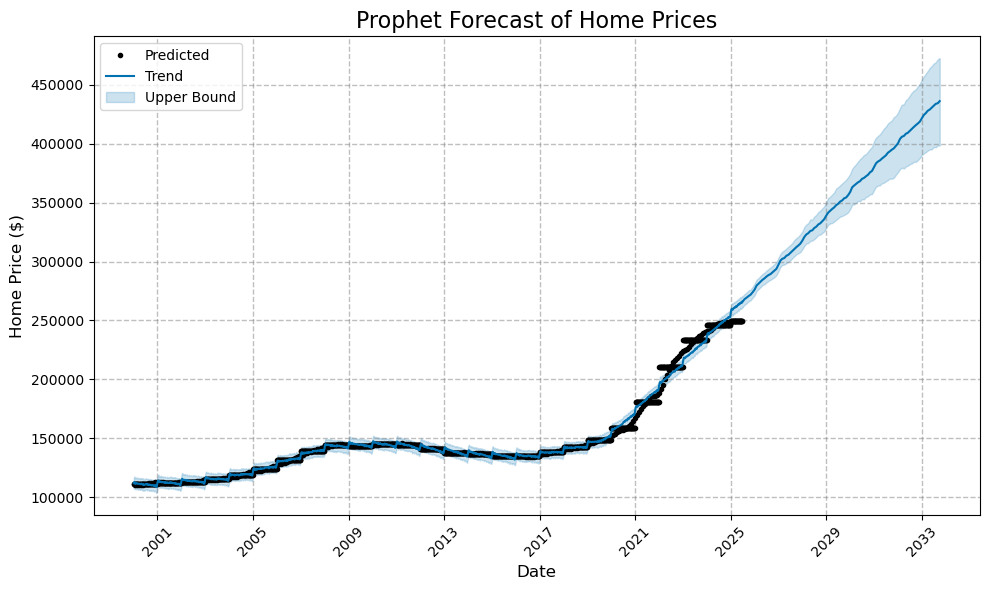

In [93]:
import matplotlib.pyplot as plt

# Generate the Prophet forecast plot
fig = model.plot(forecast)

# Customize the plot
ax = fig.gca()
ax.set_title('Prophet Forecast of Home Prices', fontsize=16)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Home Price ($)', fontsize=12)
ax.grid(True, which='both', linestyle='--', alpha=0.5)
ax.legend(['Predicted', 'Trend', 'Upper Bound', 'Lower Bound'], fontsize=10)

# Optionally rotate dates for better visibility
plt.xticks(rotation=45)
plt.tight_layout()

# For Streamlit
# st.pyplot(fig)

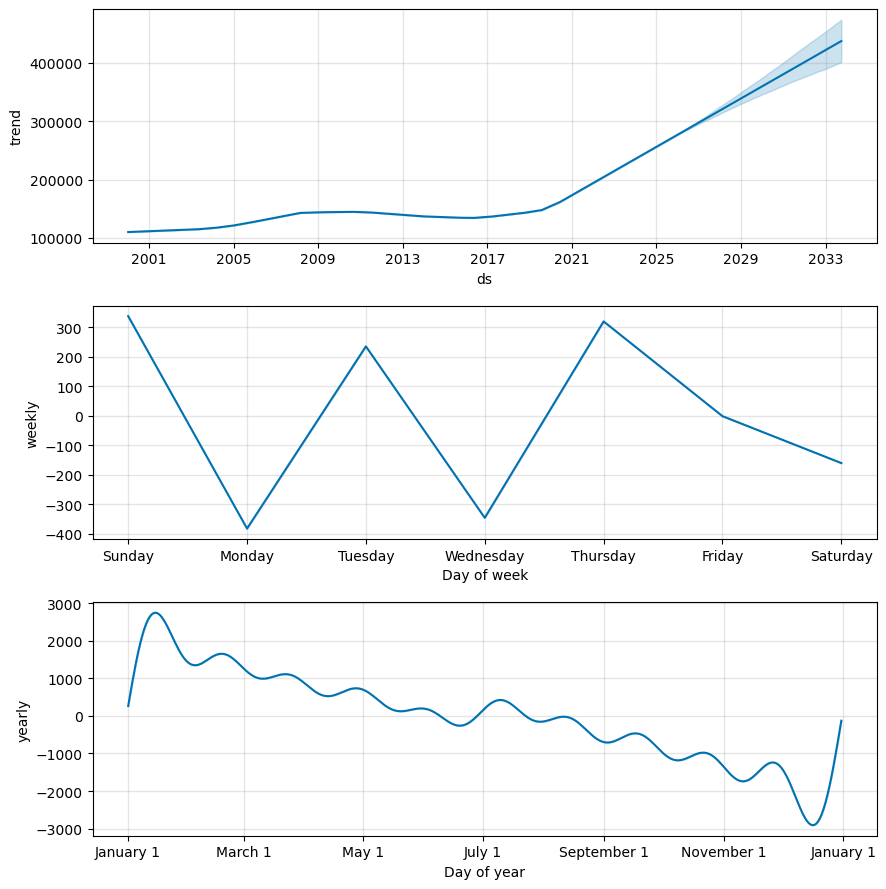

In [94]:
fig2 = model.plot_components(forecast)
# st.pyplot(fig2)